<a href="https://colab.research.google.com/github/uihyeonshin/project/blob/main/%E1%84%8B%E1%85%B5%E1%86%AB%E1%84%80%E1%85%A9%E1%86%BC%E1%84%8C%E1%85%B5%E1%84%82%E1%85%B3%E1%86%BC(ViT).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import zipfile
import os

# 원천데이터 압축 해제
def unzip_all(zip_dir, extract_root):
    os.makedirs(extract_root, exist_ok=True)
    for zip_file in os.listdir(zip_dir):
        if zip_file.endswith('.zip'):
            label_name = zip_file.replace('.zip', '')
            zip_path = os.path.join(zip_dir, zip_file)
            extract_path = os.path.join(extract_root, label_name)
            os.makedirs(extract_path, exist_ok=True)
            print(f'📦 Unzipping {zip_file} -> {extract_path}')
            with zipfile.ZipFile(zip_path, 'r') as zip_ref:
                zip_ref.extractall(extract_path)

# 경로 지정
base_drive = '/content/drive/MyDrive/1.데이터'
train_img_zip_dir = os.path.join(base_drive, 'Training/01.원천데이터')
train_lbl_zip_dir = os.path.join(base_drive, 'Training/02.라벨링데이터')

# 이미지와 라벨 압축 해제
unzip_all(train_img_zip_dir, '/content/Training/images')
unzip_all(train_lbl_zip_dir, '/content/Training/labels')


📦 Unzipping TS_멜라닌세포모반.zip -> /content/Training/images/TS_멜라닌세포모반
📦 Unzipping TS_흑색점.zip -> /content/Training/images/TS_흑색점
📦 Unzipping TS_피부섬유종.zip -> /content/Training/images/TS_피부섬유종
📦 Unzipping TS_사마귀.zip -> /content/Training/images/TS_사마귀
📦 Unzipping TS_혈관종.zip -> /content/Training/images/TS_혈관종
📦 Unzipping TS_보웬병.zip -> /content/Training/images/TS_보웬병
📦 Unzipping TS_표피낭종.zip -> /content/Training/images/TS_표피낭종
📦 Unzipping TS_비립종.zip -> /content/Training/images/TS_비립종
📦 Unzipping TS_화농 육아종.zip -> /content/Training/images/TS_화농 육아종
📦 Unzipping TS_피지샘증식증.zip -> /content/Training/images/TS_피지샘증식증
📦 Unzipping TS_악성흑색종.zip -> /content/Training/images/TS_악성흑색종
📦 Unzipping TS_광선각화증.zip -> /content/Training/images/TS_광선각화증
📦 Unzipping TS_지루각화증.zip -> /content/Training/images/TS_지루각화증
📦 Unzipping TS_기저세포ᄋ

In [3]:
# ── Validation ──
val_img_zip_dir = os.path.join(base_drive, 'Validation/01.원천데이터')
val_lbl_zip_dir = os.path.join(base_drive, 'Validation/02.라벨링데이터')
unzip_all(val_img_zip_dir, '/content/Validation/images')
unzip_all(val_lbl_zip_dir, '/content/Validation/labels')

📦 Unzipping VS_멜라닌세포모반.zip -> /content/Validation/images/VS_멜라닌세포모반
📦 Unzipping VS_흑색점.zip -> /content/Validation/images/VS_흑색점
📦 Unzipping VS_사마귀.zip -> /content/Validation/images/VS_사마귀
📦 Unzipping VS_피부섬유종.zip -> /content/Validation/images/VS_피부섬유종
📦 Unzipping VS_혈관종.zip -> /content/Validation/images/VS_혈관종
📦 Unzipping VS_보웬병.zip -> /content/Validation/images/VS_보웬병
📦 Unzipping VS_비립종.zip -> /content/Validation/images/VS_비립종
📦 Unzipping VS_표피낭종.zip -> /content/Validation/images/VS_표피낭종
📦 Unzipping VS_화농 육아종.zip -> /content/Validation/images/VS_화농 육아종
📦 Unzipping VS_피지샘증식증.zip -> /content/Validation/images/VS_피지샘증식증
📦 Unzipping VS_광선각화증.zip -> /content/Validation/images/VS_광선각화증
📦 Unzipping VS_지루각화증.zip -> /content/Validation/images/VS_지루각화증
📦 Unzipping VS_악성흑색종.zip -> /content/Validation/images/VS_악성흑색조

In [4]:
import json
import os
import pandas as pd
import unicodedata
import unicodedata

def parse_label_jsons_TS(json_root, image_root, prefix='TS_'):
    data = []

    for class_folder in os.listdir(json_root):
        class_path = os.path.join(json_root, class_folder)
        if not os.path.isdir(class_path):
            continue

        for file in os.listdir(class_path):
            if file.endswith('.json'):
                with open(os.path.join(class_path, file), 'r') as f:
                    jdata = json.load(f)
                    for ann in jdata['annotations']:
                        label = ann['diagnosis_info']['diagnosis_name']
                        filename = os.path.basename(ann['photograph']['file_path'])

                        # ✅ NFC 정규화로 변경
                        foldername = unicodedata.normalize('NFD', f'{prefix}{label}')
                        img_path = os.path.join(image_root, foldername, filename)
                        data.append({'filename': img_path, 'label': label})

    return pd.DataFrame(data)

def parse_label_jsons_VS(json_root, image_root, prefix='VS_'):
    data = []

    for class_folder in os.listdir(json_root):
        class_path = os.path.join(json_root, class_folder)
        if not os.path.isdir(class_path):
            continue

        for file in os.listdir(class_path):
            if file.endswith('.json'):
                with open(os.path.join(class_path, file), 'r') as f:
                    jdata = json.load(f)
                    for ann in jdata['annotations']:
                        label = ann['diagnosis_info']['diagnosis_name']
                        filename = os.path.basename(ann['photograph']['file_path'])

                        # ✅ NFC 정규화로 변경
                        foldername = unicodedata.normalize('NFD', f'{prefix}{label}')
                        img_path = os.path.join(image_root, foldername, filename)
                        data.append({'filename': img_path, 'label': label})

    return pd.DataFrame(data)


In [5]:
# Training (prefix = 'TS_')
train_df = parse_label_jsons_TS(
    json_root='/content/Training/labels',
    image_root='/content/Training/images',
    prefix='TS_'
)

val_df = parse_label_jsons_VS(
    json_root='/content/Validation/labels',
    image_root='/content/Validation/images',
    prefix='VS_'
)


In [6]:
print(train_df['filename'].iloc[0])
print(os.path.exists(train_df['filename'].iloc[0]))  # ✅ 이제 True 떠야 함!

print(val_df['filename'].iloc[0])
print(os.path.exists(val_df['filename'].iloc[0]))  # ✅ 이제 True 떠야 함!

/content/Training/images/TS_피지샘증식증/Z4_67288_P0_L0.png
True
/content/Validation/images/VS_흑색점/Z4_51349_P0_L0.png
True


In [7]:
# 한글 → 영어 라벨 매핑 딕셔너리
label_kor2eng = {
    '광선각화증': 'Actinic keratosis',
    '기저세포암': 'Basal cell carcinoma',
    '지루각화증': 'Benign keratosis',
    '피부섬유종': 'Dermatofibroma',
    '멜라닌세포모반': 'Melanocytic nevus',
    '악성흑색종': 'Melanoma',
    '편평세포암': 'Squamous cell carcinoma',
    '혈관종': 'Vascular lesion'
}

In [8]:
# 영어 라벨만 남기기 위한 target 클래스 리스트
target_labels = list(label_kor2eng.values())

# 1. 라벨 영어로 변환
train_df['label'] = train_df['label'].map(label_kor2eng)
val_df['label'] = val_df['label'].map(label_kor2eng)

# 2. 매핑 안된 라벨 (NaN) 제거 → 즉, 타겟 클래스 외 제거
train_df = train_df.dropna(subset=['label'])
val_df = val_df.dropna(subset=['label'])

# 결과 확인
print("✔️ 변환 후 train_df 라벨 분포:")
print(train_df['label'].value_counts())
print("\n✔️ 변환 후 val_df 라벨 분포:")
print(val_df['label'].value_counts())

✔️ 변환 후 train_df 라벨 분포:
label
Benign keratosis           800
Actinic keratosis          800
Melanocytic nevus          800
Squamous cell carcinoma    800
Vascular lesion            800
Basal cell carcinoma       800
Melanoma                   800
Dermatofibroma             800
Name: count, dtype: int64

✔️ 변환 후 val_df 라벨 분포:
label
Melanoma                   100
Vascular lesion            100
Benign keratosis           100
Squamous cell carcinoma    100
Melanocytic nevus          100
Actinic keratosis          100
Basal cell carcinoma       100
Dermatofibroma             100
Name: count, dtype: int64


In [9]:
print(train_df['filename'].iloc[0])
print(os.path.exists(train_df['filename'].iloc[0]))

print(train_df['label'].unique())  # 라벨 이상 없는지
print(train_df.isnull().sum())    # 결측치 있는지


/content/Training/images/TS_지루각화증/Z4_29011_P0_L0.png
True
['Benign keratosis' 'Actinic keratosis' 'Melanocytic nevus'
 'Squamous cell carcinoma' 'Vascular lesion' 'Basal cell carcinoma'
 'Melanoma' 'Dermatofibroma']
filename    0
label       0
dtype: int64


In [10]:
# 1. 압축 해제
zip_path = '/content/drive/MyDrive/image/archive.zip'
extract_dir = '/content/image'

with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extract_dir)

print(f"✅ 압축 해제 완료: {extract_dir}")

✅ 압축 해제 완료: /content/image


In [11]:
image_root1 = '/content/image/ISIC_Labelled'
data = []

for label in os.listdir(image_root1):
    label_path = os.path.join(image_root1, label)
    if os.path.isdir(label_path):
        for fname in os.listdir(label_path):
            if fname.lower().endswith(('.jpg', '.jpeg', '.png')):
                fpath = os.path.join(label_path, fname)  # 🔥 여기 핵심
                data.append({'filename': fpath, 'label': label})

df_isic = pd.DataFrame(data)

# 확인
print(df_isic.head())
print(f"\n✅ 총 이미지 수: {len(df_isic)}")
print(f"📊 클래스 수: {df_isic['label'].nunique()}")
print(f"🧷 클래스 목록: {df_isic['label'].unique()}")



                                            filename     label
0  /content/image/ISIC_Labelled/Melanoma/ISIC_003...  Melanoma
1  /content/image/ISIC_Labelled/Melanoma/ISIC_006...  Melanoma
2  /content/image/ISIC_Labelled/Melanoma/ISIC_005...  Melanoma
3  /content/image/ISIC_Labelled/Melanoma/ISIC_006...  Melanoma
4  /content/image/ISIC_Labelled/Melanoma/ISIC_006...  Melanoma

✅ 총 이미지 수: 25331
📊 클래스 수: 8
🧷 클래스 목록: ['Melanoma' 'Melanocytic nevus' 'Vascular lesion' 'Dermatofibroma'
 'Actinic keratosis' 'Squamous cell carcinoma' 'Basal cell carcinoma'
 'Benign keratosis']


In [12]:
full_ddf = pd.concat([train_df, val_df, df_isic], ignore_index=True)
print(f"🔄 전체 데이터 수: {len(full_ddf)}")
print(full_ddf['label'].value_counts())


🔄 전체 데이터 수: 32531
label
Melanocytic nevus          13775
Melanoma                    5422
Basal cell carcinoma        4223
Benign keratosis            3524
Actinic keratosis           1767
Squamous cell carcinoma     1528
Vascular lesion             1153
Dermatofibroma              1139
Name: count, dtype: int64


In [13]:
from sklearn.model_selection import train_test_split
from sklearn.utils import class_weight
import numpy as np

# Train 80% / Temp 20%
train_df, temp_df = train_test_split(
    full_ddf, test_size=0.2, stratify=full_ddf['label'], random_state=42
)

# Temp → Validation 10% / Test 10%
val_df, test_df = train_test_split(
    temp_df, test_size=0.5, stratify=temp_df['label'], random_state=42
)

print(f"Train: {len(train_df)}개, Val: {len(val_df)}개, Test: {len(test_df)}개")

# 2. class_weight 계산
class_weights = class_weight.compute_class_weight(
    class_weight='balanced',
    classes=np.unique(train_df['label']),
    y=train_df['label']
)
class_weights_dict = dict(zip(np.unique(train_df['label']), class_weights))



Train: 26024개, Val: 3253개, Test: 3254개


In [14]:
# 5. ImageDataGenerator
from tensorflow.keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255)

train_datagen = ImageDataGenerator(
    rescale=1./255,
    rotation_range=45,
    zoom_range=0.3,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

train_gen = train_datagen.flow_from_dataframe(
    train_df, x_col='filename', y_col='label',
    target_size=(224, 224), class_mode='categorical',
    batch_size=32, shuffle=True
)
val_gen = datagen.flow_from_dataframe(
    val_df, x_col='filename', y_col='label',
    target_size=(224, 224), class_mode='categorical',
    batch_size=32, shuffle=False
)
test_gen = datagen.flow_from_dataframe(
    test_df, x_col='filename', y_col='label',
    target_size=(224, 224), class_mode='categorical',
    batch_size=32, shuffle=False
)

Found 26024 validated image filenames belonging to 8 classes.
Found 3253 validated image filenames belonging to 8 classes.
Found 3254 validated image filenames belonging to 8 classes.


In [15]:
print(train_df.head())
print(train_df['filename'].iloc[0])
print(os.path.exists(train_df['filename'].iloc[0]))
train_df['filename'].apply(os.path.exists).sum()


                                                filename                 label
15297  /content/image/ISIC_Labelled/Melanocytic nevus...     Melanocytic nevus
24665  /content/image/ISIC_Labelled/Vascular lesion/I...       Vascular lesion
14027  /content/image/ISIC_Labelled/Melanocytic nevus...     Melanocytic nevus
23840  /content/image/ISIC_Labelled/Melanocytic nevus...     Melanocytic nevus
28631  /content/image/ISIC_Labelled/Basal cell carcin...  Basal cell carcinoma
/content/image/ISIC_Labelled/Melanocytic nevus/ISIC_0032041.jpg
True


np.int64(26024)

In [16]:
!pip install -q tensorflow tensorflow-addons

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 611.8/611.8 kB 31.0 MB/s eta 0:00:00
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
inflect 7.5.0 requires typeguard>=4.0.1, but you have typeguard 2.13.3 which is incompatible.


In [17]:
from PIL import ImageFile
ImageFile.LOAD_TRUNCATED_IMAGES = True  # ✅ 손상된 이미지도 무시하고 불러오기

In [18]:

import tensorflow as tf
import tensorflow_hub as hub
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Dense, Dropout, Flatten, Lambda
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# 클래스 수 자동 계산
num_classes = len(train_gen.class_indices)

# 입력 정의
input_layer = Input(shape=(224, 224, 3), name='input_image')

# ViT 모델을 Lambda로 감싸서 처리
vit_extractor = hub.KerasLayer(
    "https://tfhub.dev/sayakpaul/vit_b16_fe/1",
    trainable=False
)

# Lambda로 감싸기 (Symbolic Tensor 대응)
vit_features = Lambda(lambda x: vit_extractor(x))(input_layer)

# 분류기 정의
x = Flatten()(vit_features)
x = Dense(512, activation='relu')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
output_layer = Dense(num_classes, activation='softmax')(x)

# 모델 구성
model = Model(inputs=input_layer, outputs=output_layer)

# 컴파일
from tensorflow.keras.optimizers import AdamW
model.compile(optimizer=AdamW(learning_rate=1e-4, weight_decay=1e-5),
              loss='categorical_crossentropy',
              metrics=['accuracy'])
# 4. 콜백
callbacks = [
    EarlyStopping(patience=5, restore_best_weights=True),
    ModelCheckpoint('convnext_best.keras', save_best_only=True, monitor='val_accuracy')
]

# 학습
history = model.fit(
    train_gen,
    epochs=10,
    validation_data=val_gen,
    class_weight=class_weights_dict,
    callbacks=callbacks
)


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


Epoch 1/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 548s 645ms/step - accuracy: 0.4751 - loss: 1.7050 - val_accuracy: 0.7006 - val_loss: 0.8635
Epoch 2/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 494s 607ms/step - accuracy: 0.6743 - loss: 0.9311 - val_accuracy: 0.7261 - val_loss: 0.7734
Epoch 3/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 496s 609ms/step - accuracy: 0.7105 - loss: 0.8240 - val_accuracy: 0.7396 - val_loss: 0.7399
Epoch 4/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 494s 606ms/step - accuracy: 0.7187 - loss: 0.7924 - val_accuracy: 0.7532 - val_loss: 0.7073
Epoch 5/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 493s 605ms/step - accuracy: 0.7358 - loss: 0.7387 - val_accuracy: 0.7504 - val_loss: 0.6959
Epoch 6/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 495s 608ms/step - accuracy: 0.7379 - loss: 0.7273 - val_accuracy: 0.7624 - val_loss: 0.6620
Epoch 7/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 492s 605ms/step - accuracy: 0.7481 - loss: 0.6989 - val_accuracy: 0.7664 - val_loss: 0.6531
Epoch 8/10
814/814 ━━━━━━━━━━━━━━━━━━━━ 495s 608ms/step - accuracy: 0.7559 -

In [19]:
# Test Set 평가
test_loss, test_acc = model.evaluate(test_gen)
print(f"✅ Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")


102/102 ━━━━━━━━━━━━━━━━━━━━ 41s 398ms/step - accuracy: 0.7701 - loss: 0.6547
✅ Test Accuracy: 0.7680, Test Loss: 0.6487


In [20]:
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# 예측 확률
y_pred_proba = model.predict(test_gen)
y_pred = np.argmax(y_pred_proba, axis=1)

# 실제 라벨
y_true = test_gen.classes  # ⬅️ flow_from_dataframe 생성 시 자동 포함

# 라벨 인덱스 → 클래스 이름 매핑
class_names = list(test_gen.class_indices.keys())

# 분류 리포트
print("\n📄 Classification Report:")
print(classification_report(y_true, y_pred, target_names=class_names))


102/102 ━━━━━━━━━━━━━━━━━━━━ 36s 311ms/step

📄 Classification Report:
                         precision    recall  f1-score   support

      Actinic keratosis       0.77      0.58      0.66       176
   Basal cell carcinoma       0.73      0.76      0.75       423
       Benign keratosis       0.54      0.69      0.60       353
         Dermatofibroma       0.99      0.81      0.89       114
      Melanocytic nevus       0.83      0.87      0.85      1378
               Melanoma       0.73      0.62      0.67       542
Squamous cell carcinoma       0.93      0.62      0.75       153
        Vascular lesion       0.91      0.92      0.92       115

               accuracy                           0.77      3254
              macro avg       0.80      0.73      0.76      3254
           weighted avg       0.78      0.77      0.77      3254



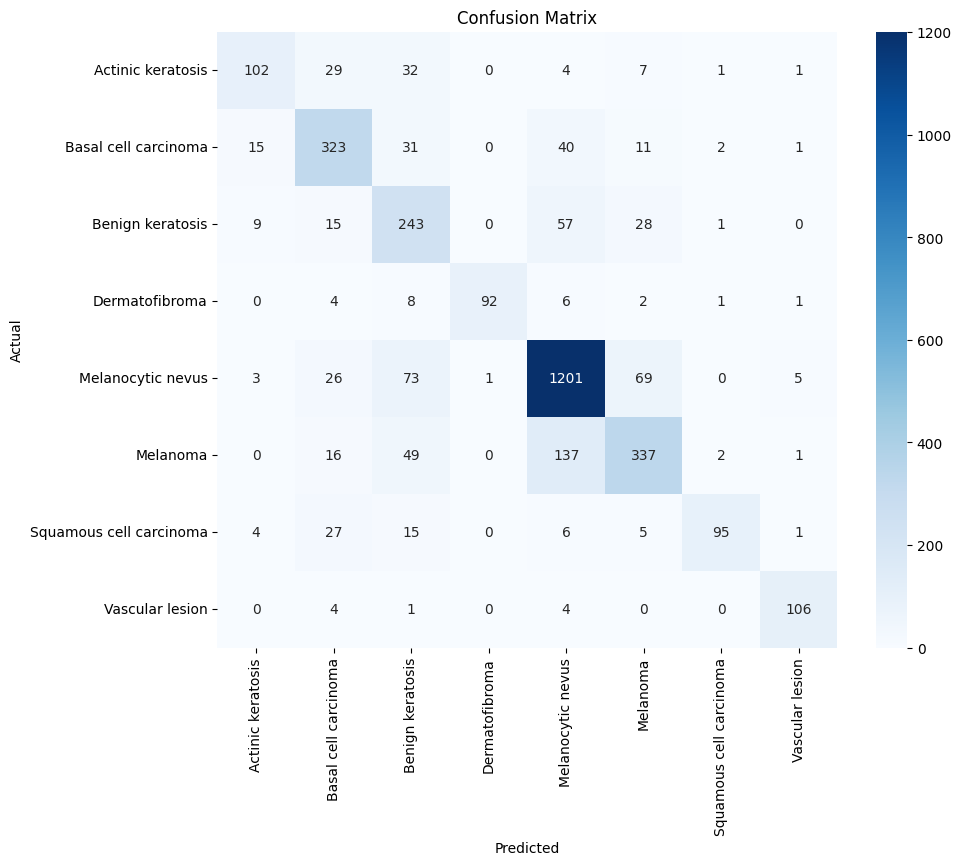

In [21]:
# 혼동 행렬 시각화
cm = confusion_matrix(y_true, y_pred)

plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=class_names, yticklabels=class_names)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()


In [23]:
# 1️⃣ ViT extractor를 trainable하게 다시 생성
vit_extractor = hub.KerasLayer(
    "https://tfhub.dev/sayakpaul/vit_b16_fe/1",
    trainable=True,  # ✅ fine-tuning 활성화
    name='vit_feature_extractor'
)

# 2️⃣ 기존 모델 구조 다시 정의 (Lambda 포함)
input_layer = Input(shape=(224, 224, 3), name='input_image')
vit_features = Lambda(lambda x: vit_extractor(x))(input_layer)

x = Flatten()(vit_features)
x = Dense(256, activation='relu')(x)
x = Dropout(0.3)(x)
output_layer = Dense(num_classes, activation='softmax')(x)

# 3️⃣ 새로운 모델로 구성
model = Model(inputs=input_layer, outputs=output_layer)

# 4️⃣ 반드시 다시 compile
model.compile(optimizer=Adam(1e-5),  # 작은 learning rate로
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# 5️⃣ fine-tuning 수행
fine_tune_history = model.fit(
    train_gen,
    epochs=5,  # 🔁 추가 에폭 수 (조절 가능)
    validation_data=val_gen,
    class_weight=class_weights_dict,
    callbacks=callbacks
)


Epoch 1/5
814/814 ━━━━━━━━━━━━━━━━━━━━ 513s 619ms/step - accuracy: 0.2740 - loss: 2.7396 - val_accuracy: 0.5149 - val_loss: 1.4120
Epoch 2/5
814/814 ━━━━━━━━━━━━━━━━━━━━ 496s 609ms/step - accuracy: 0.5162 - loss: 1.4788 - val_accuracy: 0.6010 - val_loss: 1.1676
Epoch 3/5
814/814 ━━━━━━━━━━━━━━━━━━━━ 494s 606ms/step - accuracy: 0.5999 - loss: 1.2032 - val_accuracy: 0.6339 - val_loss: 1.0559
Epoch 4/5
814/814 ━━━━━━━━━━━━━━━━━━━━ 491s 604ms/step - accuracy: 0.6261 - loss: 1.1090 - val_accuracy: 0.6566 - val_loss: 0.9902
Epoch 5/5
814/814 ━━━━━━━━━━━━━━━━━━━━ 494s 607ms/step - accuracy: 0.6537 - loss: 1.0200 - val_accuracy: 0.6720 - val_loss: 0.9435


In [24]:
# Test Set 평가
test_loss, test_acc = model.evaluate(test_gen)
print(f"✅ Test Accuracy: {test_acc:.4f}, Test Loss: {test_loss:.4f}")

102/102 ━━━━━━━━━━━━━━━━━━━━ 31s 300ms/step - accuracy: 0.6713 - loss: 0.9785
✅ Test Accuracy: 0.6752, Test Loss: 0.9693


In [ ]:
from tensorflow.keras.preprocessing import image
import os

blind_dir = '/content/drive/MyDrive'  # 경로 수정
blind_filenames = [os.path.join(blind_dir, fname) for fname in os.listdir(blind_dir)
                   if fname.lower().endswith(('.jpg', '.jpeg', '.png'))]

# 이미지 로딩 및 전처리
def preprocess_image(img_path):
    img = image.load_img(img_path, target_size=(224, 224))
    img_array = image.img_to_array(img) / 255.0
    return img_array

X_blind = np.array([preprocess_image(path) for path in blind_filenames])
pred_probs = model.predict(X_blind)
pred_classes = np.argmax(pred_probs, axis=1)

# 클래스명 디코딩
idx_to_class = {v: k for k, v in test_gen.class_indices.items()}
pred_labels = [idx_to_class[i] for i in pred_classes]

# 결과 매핑
results = pd.DataFrame({
    'filename': blind_filenames,
    'predicted_label': pred_labels
})

print(results.head())